In [210]:
# Importing the libraries
import pandas as pd
import matplotlib.pyplot as plt

In [203]:
# Importing pandas for data manipulation
import pandas as pd

# Reading the data from a CSV file into a DataFrame
df = pd.read_csv('data.csv')

# Displaying the DataFrame
df

,Job Name,Company,Deadline,Location
0,Բուժքույր ստոմատոլոգիական կլինիկայի համար,Ավանտա նորարարական բժշկության կենտրոն,22 April 2024,Yerevan
1,Ադմինիստրատոր,Ավանտա նորարարական բժշկության կենտրոն,22 April 2024,Yerevan
2,Tour Manager,ՌԵՎԵԼ ՏՈՒՐ,22 April 2024,Gyumri
3,Receptionist,Skyline Tour Service,21 April 2024,Yerevan
4,Tech lead of product teams (Tribe),Ameriabank CJSC,04 April 2024,Yerevan
...,...,...,...,...
1312,HR Director,"""Max Station"" LLC",23 March 2024,Yerevan
1313,Արտադրության 1C օպերատոր,Genacvale Tavern,23 March 2024,Yerevan
1314,Strategy and Transactions Analyst at EY office...,Ernst and Young CJSC (EY),23 March 2024,Yerevan
1315,Հաշվետար,Հայաստանի Հաշվապահների Ասոցիացիա,23 March 2024,Yerevan


In [204]:
# Displaying the first few rows of the DataFrame
print(df.head())

# Printing summary information about the DataFrame
print(df.info())

                                    Job Name  \
0  Բուժքույր ստոմատոլոգիական կլինիկայի համար   
1                              Ադմինիստրատոր   
2                               Tour Manager   
3                               Receptionist   
4         Tech lead of product teams (Tribe)   

                                 Company       Deadline Location  
0  Ավանտա նորարարական բժշկության կենտրոն  22 April 2024  Yerevan  
1  Ավանտա նորարարական բժշկության կենտրոն  22 April 2024  Yerevan  
2                             ՌԵՎԵԼ ՏՈՒՐ  22 April 2024   Gyumri  
3                   Skyline Tour Service  21 April 2024  Yerevan  
4                        Ameriabank CJSC  04 April 2024  Yerevan  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1317 entries, 0 to 1316
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Job Name  1317 non-null   object
 1   Company   1317 non-null   object
 2   Deadline  1317 non-null   object
 3   Location

In [205]:
# Removing duplicate rows from the DataFrame
df.drop_duplicates(inplace=True)

# Removing rows with missing values from the DataFrame
df.dropna(inplace=True)

In [206]:
# Counting the number of jobs for each company
company_jobs = df['Company'].value_counts()

# Printing the count of jobs for each company
print(company_jobs)

Company
SoftConstruct                               54
Digitain                                    51
FastBank CJSC                               26
VTB Bank (Armenia)                          25
Ameriabank CJSC                             24
                                            ..
Prokat.am                                    1
Ֆրիվեյ Ֆայնանս ՓԲԸ                           1
Caucasus Research Resource Center (CRRC)     1
Zangak Publishing House                      1
Էվրի Դեյ ՓԲԸ                                 1
Name: count, Length: 486, dtype: int64


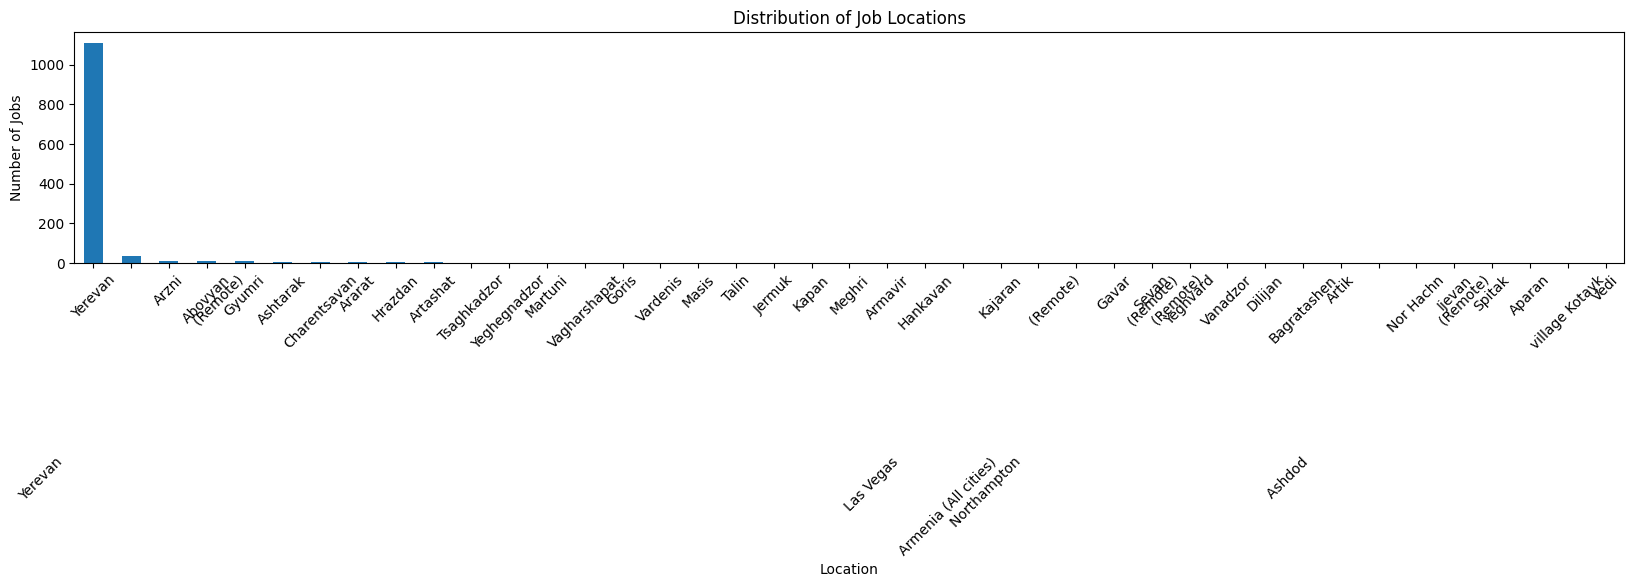

In [207]:
# Counting the number of jobs for each location
job_locations = df['Location'].value_counts()

# Creating a bar plot to visualize the distribution of job locations
plt.figure(figsize=(20, 3))
job_locations.plot(kind='bar')
plt.title('Distribution of Job Locations')
plt.xlabel('Location')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.show()

Average number of jobs posted by each company: 2.6


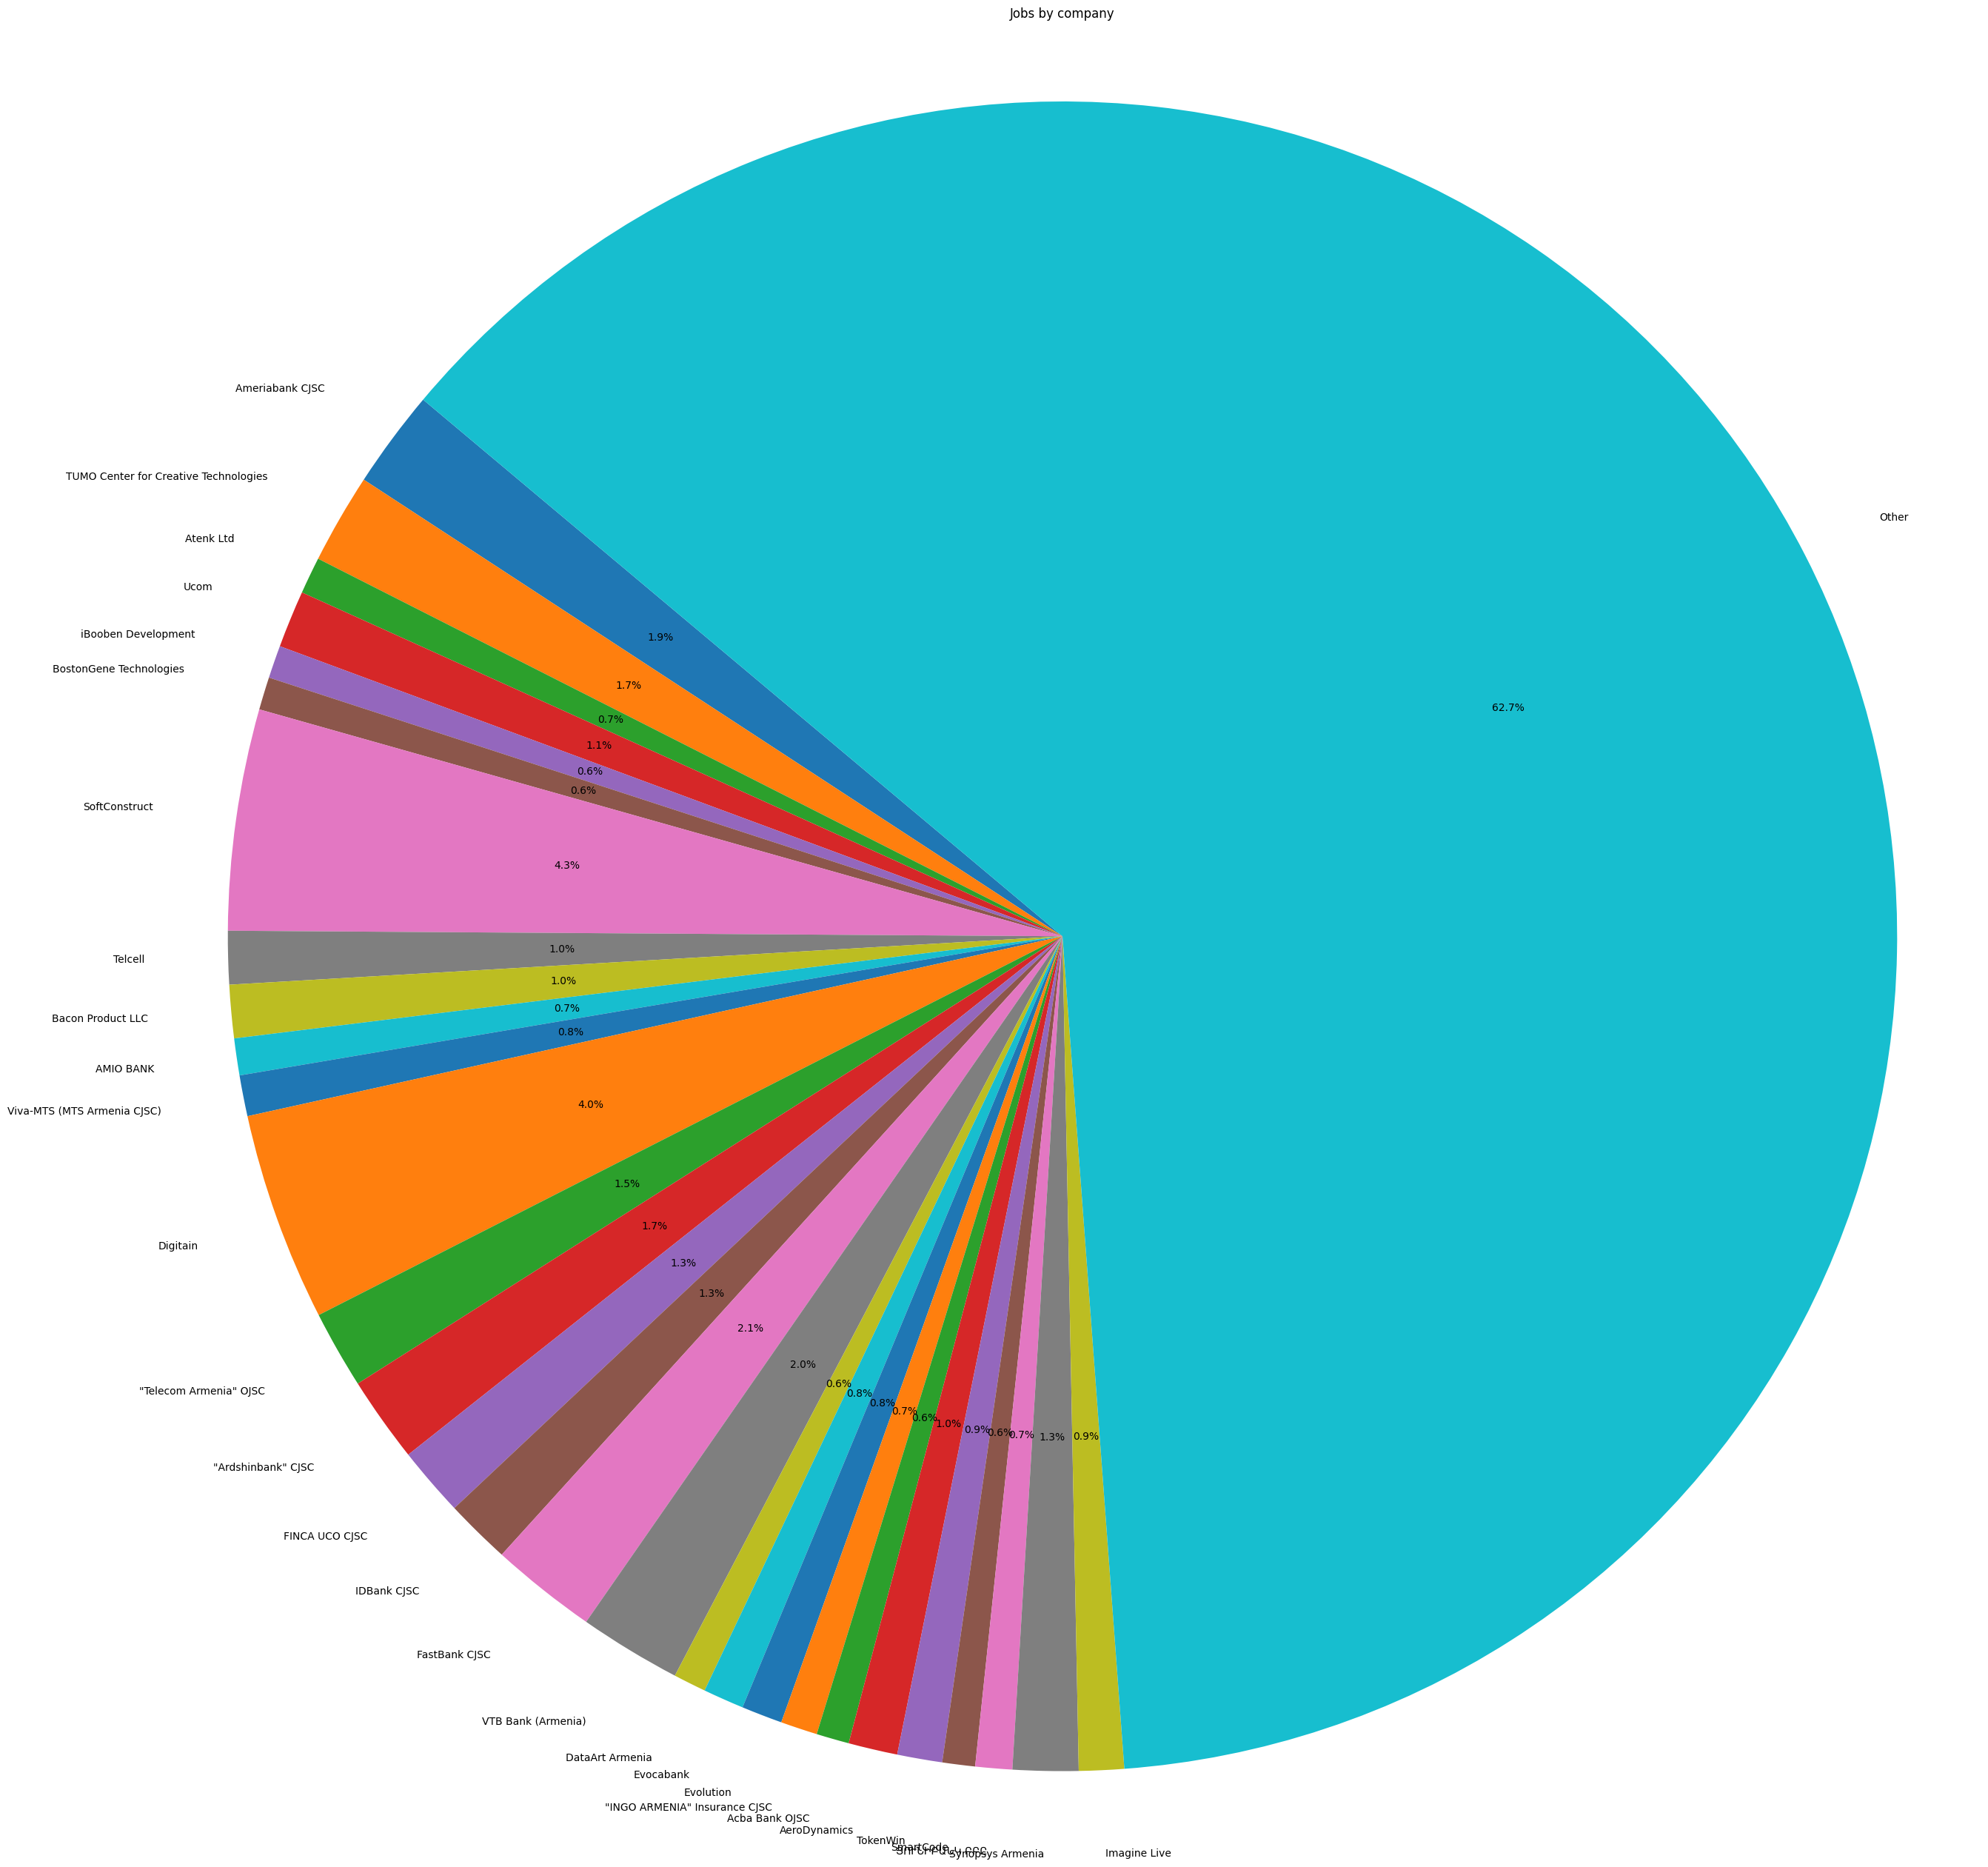

In [208]:
# Calculating the average number of jobs posted by each company
avg_jobs_per_company = round(company_jobs.mean(), 2)
print("Average number of jobs posted by each company:", avg_jobs_per_company)

# Calculate percentage for each company
unique_companies = df['Company'].unique()
companies = []
percentages = []
other = 0

# Iterate over unique companies
for company_name in unique_companies:
    # Count the number of jobs for the current company
    company_jobs = df[df['Company'] == company_name].shape[0]
    total_jobs = df.shape[0]
    # Calculate the percentage of jobs for the current company
    percentage = (company_jobs / total_jobs) * 100
    # If percentage is greater than 0.5%, include the company
    if percentage > 0.5:
        companies.append(company_name)
        percentages.append(percentage)
    # Otherwise, accumulate in the "Other" category
    else:
        other += percentage

# Append "Other" category
companies.append('Other')
percentages.append(other)

# Set the size of the figure
plt.figure(figsize=(32, 32))

# Create the pie chart
plt.pie(percentages, labels=companies, autopct='%1.1f%%', startangle=140)
plt.title('Jobs by company')
plt.axis('equal')
plt.show()

Average number of jobs posted by each major: 1.18


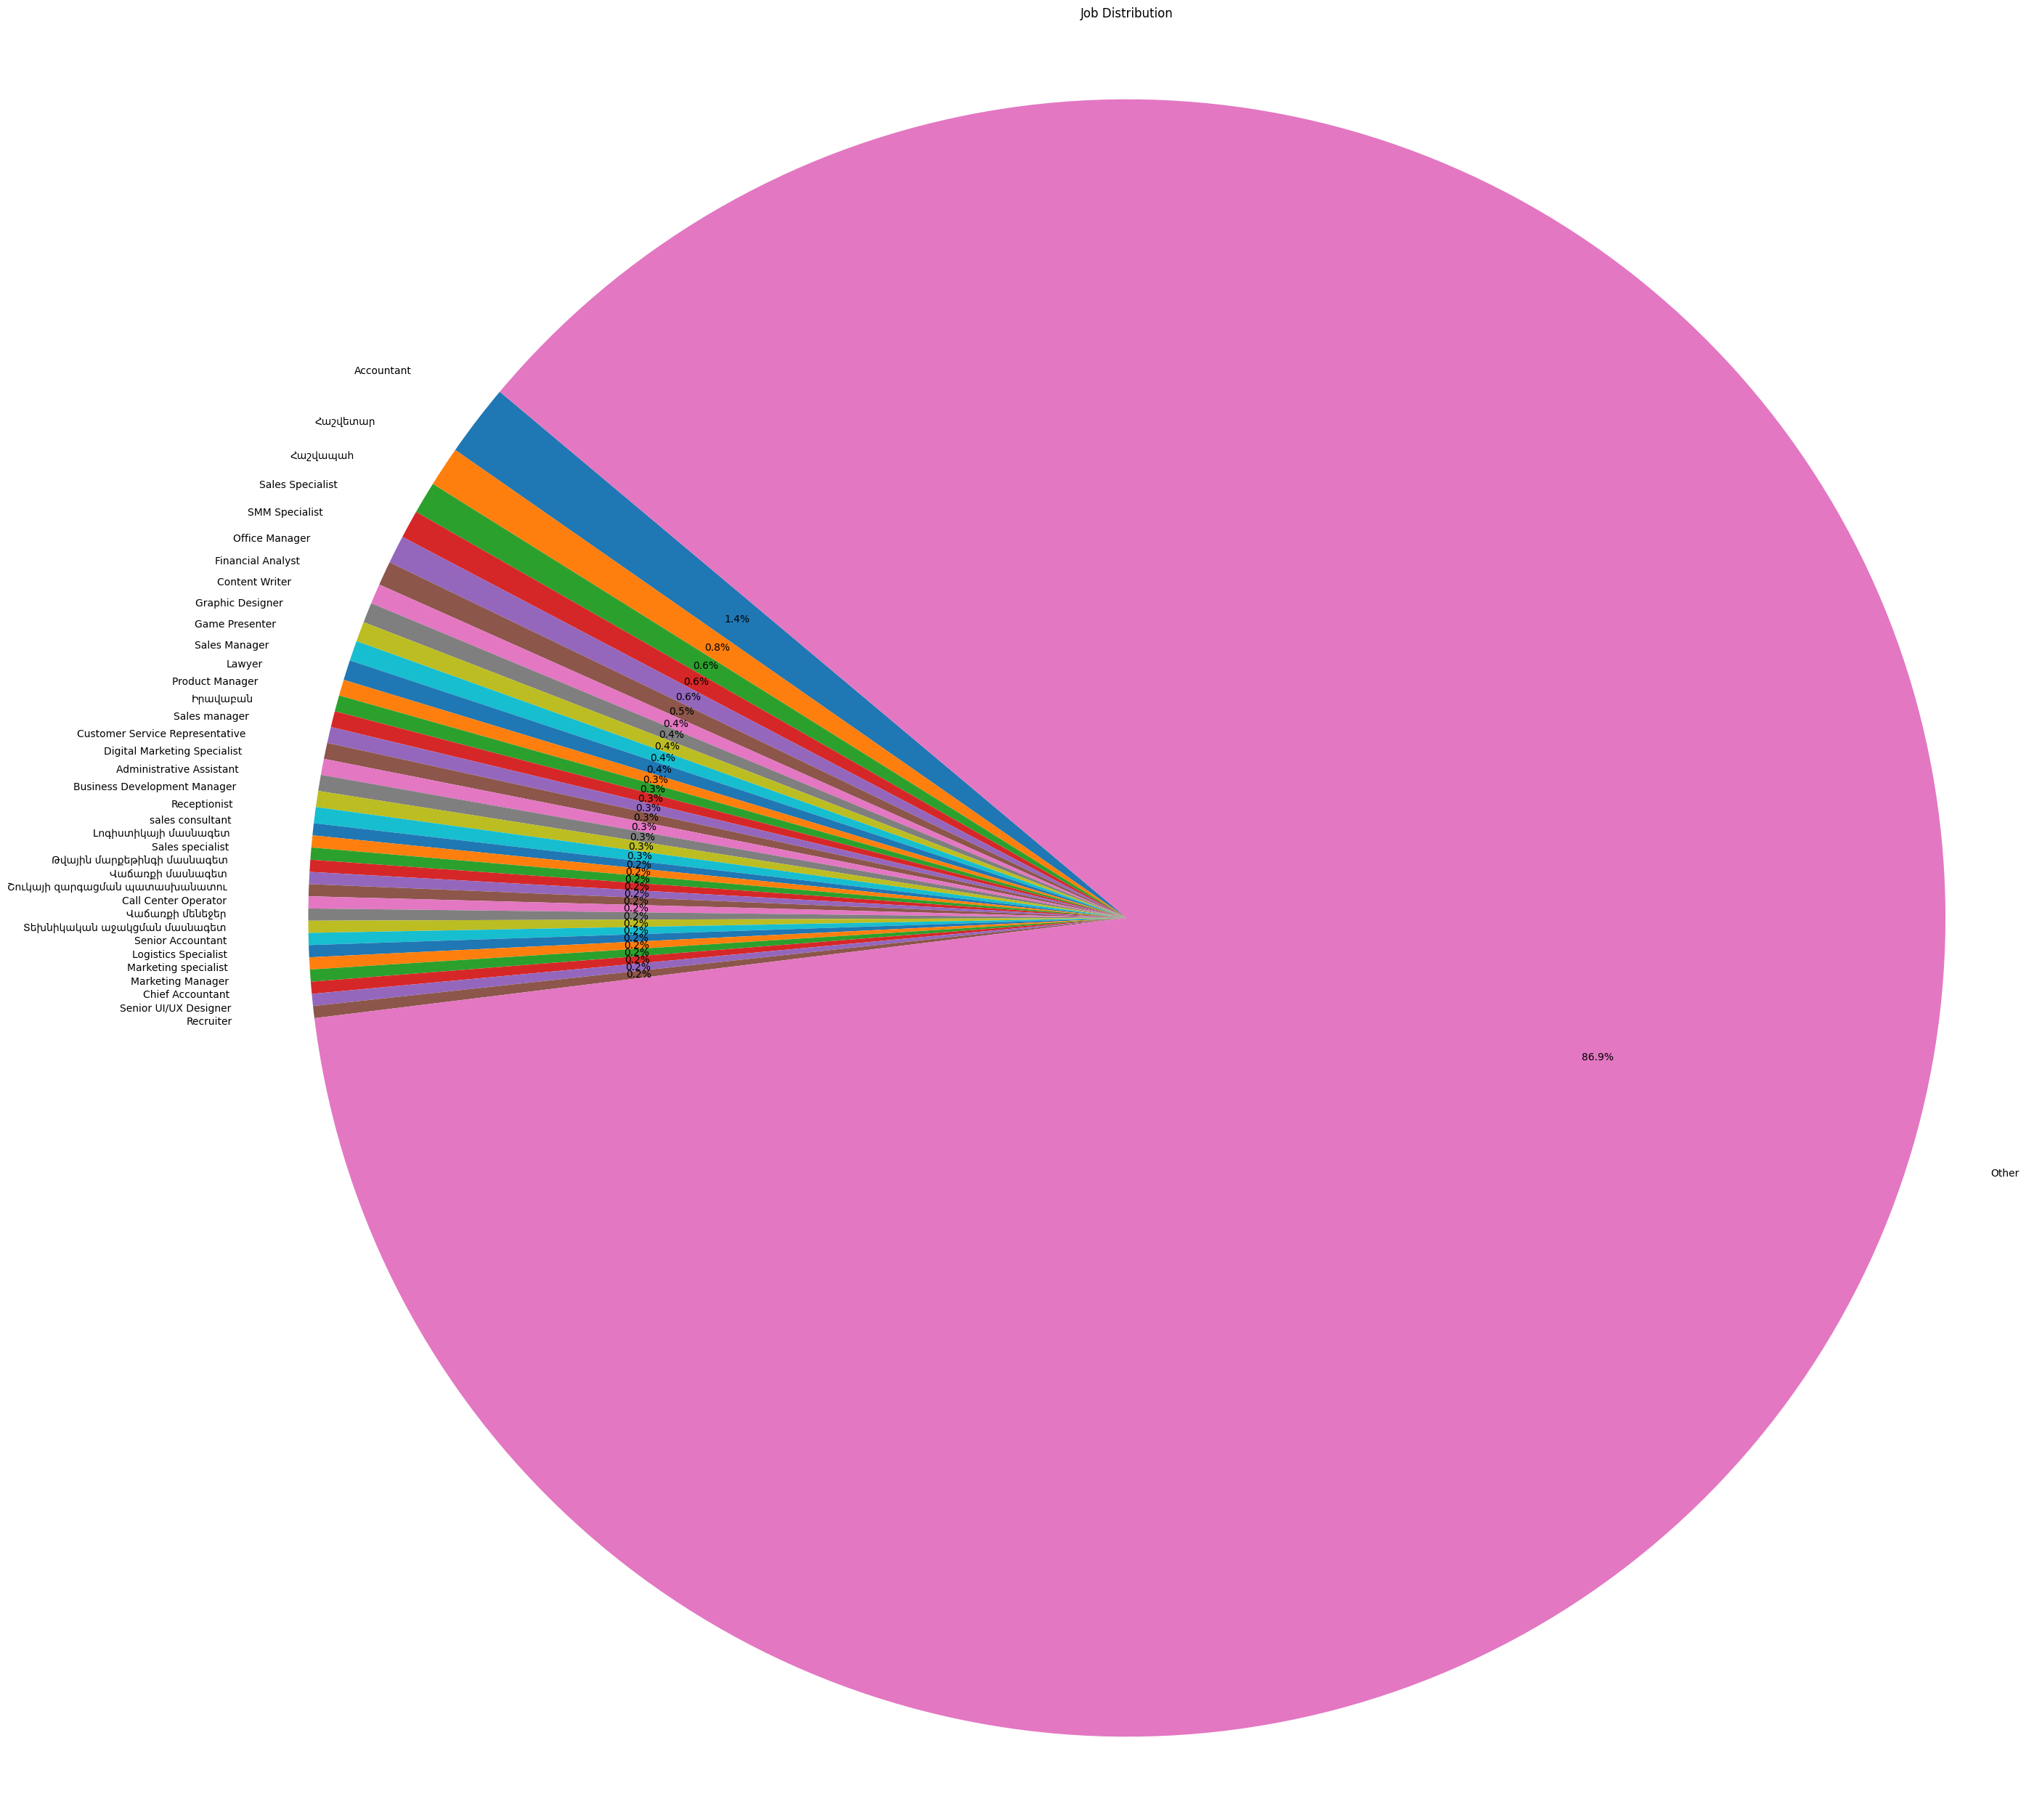

In [209]:
# Calculating the average number of jobs posted by each major
avg_jobs_per_major = round(major_jobs.mean(), 2)
print("Average number of jobs posted by each major:", avg_jobs_per_major)

# Calculate percentage for each job title
job_counts = df['Job Name'].value_counts()
total_jobs = job_counts.sum()

# Prepare data for the pie chart
job_names = []
percentages = []
other = 0

# Calculate percentage for each job title
for job_name, count in job_counts.items():
    percentage = (count / total_jobs) * 100
    # If percentage is greater than 0.2%, include the job title
    if percentage > 0.2:
        job_names.append(job_name)
        percentages.append(percentage)
    # Otherwise, accumulate in the "Other" category
    else:
        other += percentage

# Append "Other" category
job_names.append('Other')
percentages.append(other)

# Set the size of the figure
plt.figure(figsize=(32, 32))

# Create the pie chart
plt.pie(percentages, labels=job_names, autopct='%1.1f%%', startangle=140)
plt.title('Job Distribution')
plt.axis('equal')
plt.show()